# SUICIDE 

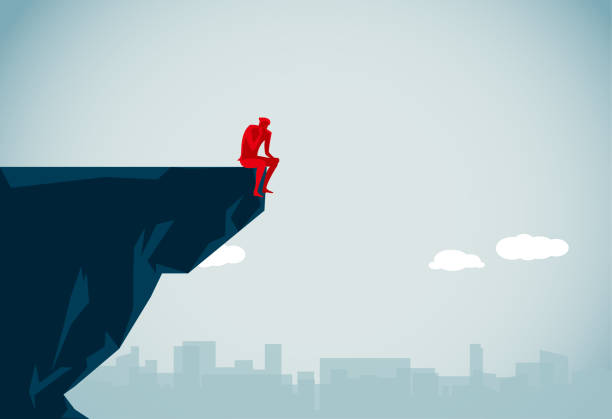

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import  seaborn as sns

# About

### Introduction

* Every year, close to 800,000 people take their own lives, and there are many more people who attempt suicide. Every suicide is a tragedy that affects families, communities, and entire countries and has long-lasting effects on the people left behind. Suicide is a serious public health problem. However, suicides are preventable with timely, evidence-based, and often low-cost interventions. A comprehensive multi-sectoral suicide prevention strategy is needed for national responses to be effective.

* Suicide is a major concern across the world. And people who say that suicides are committed by weak people are pretty much wrong. Only the person who is committing suicide knows what he or she is going through.


In [3]:
go=pd.read_csv('who_suicide_statistics.csv')
go.shape

(43776, 6)

In [22]:
go.head(5)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [4]:
go.sample(10)

,country,year,sex,age,suicides_no,population
32177,Reunion,2003,female,75+ years,0.0,13877.0
8389,Cayman Islands,2005,female,25-34 years,0.0,NaN
4431,Belarus,1990,female,5-14 years,3.0,763600.0
27985,Norway,1992,female,25-34 years,21.0,316800.0
27674,Nicaragua,2003,female,35-54 years,16.0,NaN
3873,Bahrain,2007,male,5-14 years,0.0,74222.0
6300,Brazil,1987,female,15-24 years,291.0,14145640.0
32993,Russian Federation,1983,female,75+ years,NaN,3940800.0
37273,Suriname,1982,female,25-34 years,4.0,15200.0
6969,British Virgin Islands,2009,male,5-14 years,0.0,NaN


In [5]:
go.tail(5)

,country,year,sex,age,suicides_no,population
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN
43775,Zimbabwe,1990,male,75+ years,13.0,NaN


In [6]:
go.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [7]:

go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [8]:
go.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [9]:
go.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [10]:
print(go.dtypes)

country         object
year             int64
sex             object
age             object
suicides_no    float64
population     float64
dtype: object


In [11]:
go["suicides_no"]=go["suicides_no"].fillna(0)

In [12]:
go['age'].unique()

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

# Data Clean After

# 2)DATA VISUALIZATION

 # 20 Country with most suicide case all the time

In [13]:
su_country = go.groupby('country').suicides_no.sum().sort_values(ascending=False).head(20)
su_country

country
Russian Federation          1500992.0
United States of America    1201401.0
Japan                        937614.0
France                       395500.0
Ukraine                      365170.0
Germany                      291262.0
Republic of Korea            261730.0
Brazil                       250824.0
Poland                       172562.0
United Kingdom               166314.0
Italy                        157074.0
Hungary                      130018.0
Thailand                     129899.0
Canada                       128382.0
Kazakhstan                   123151.0
Mexico                       117479.0
Spain                        110097.0
Argentina                     93862.0
Sri Lanka                     80747.0
Australia                     80279.0
Name: suicides_no, dtype: float64

* In the above data, suicide cases are high in the Russian Federation.

# Suicide case over the world throughout the years (1979 - 2016)

In [4]:
suicide_per_year = go.groupby('year').suicides_no.sum()

# Plot Suicides per year Data

/home/rkmveri/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


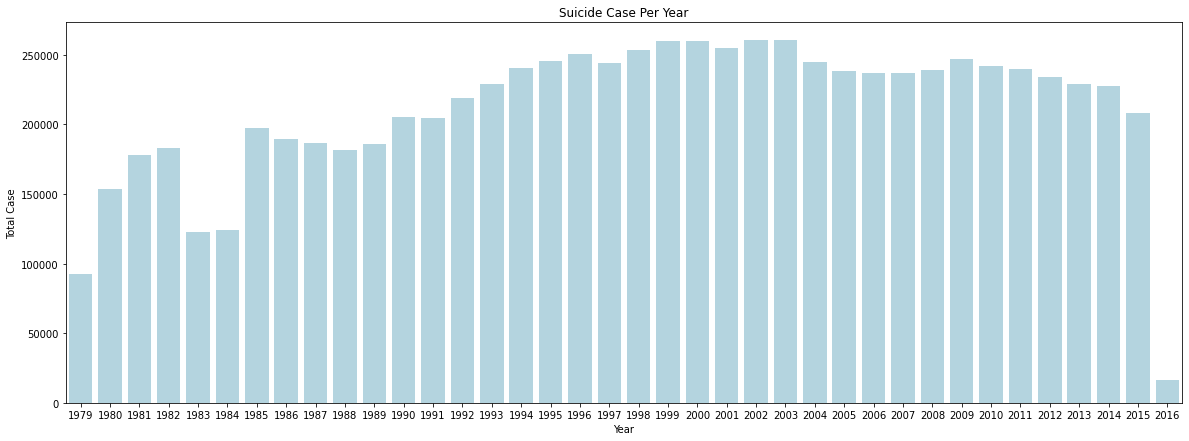

In [15]:
plt.figure(figsize=(20,7))
ax = sns.barplot(suicide_per_year.index, suicide_per_year.values, palette=['lightblue'])
ax.set_title('Suicide Case Per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Total Case')
plt.show()

In [52]:
go[['suicides_no','Year Range']].groupby(['Year Range']).agg('sum').sort_values(by = 'suicides_no',
        ascending = False).head(10).style.background_gradient(cmap = 'PuBu')

,suicides_no
Year Range,
1996 - 2005,2514462.000000
1986 - 1995,2149325.000000
2006 - 2016,2121808.000000
1975 - 1985,1240860.000000


From 1996 to 2005, two million five hundred fourteen thousand four hundred sixty-two people died in the 9 years between them.

# Top Five Countries

In [51]:
go[['country' , 'suicides_no']].groupby(['country']).agg('sum').sort_values('suicides_no' 
            , ascending = False).head(5).style.background_gradient('PuBu')

,suicides_no
country,
Russian Federation,1500992.000000
United States of America,1201401.000000
Japan,937614.000000
France,395500.000000
Ukraine,365170.000000


these are top five Countries which most  suicide cases has been recored

## Top 10 Countries with Suicide ceses age wise

<AxesSubplot:ylabel='country,age'>

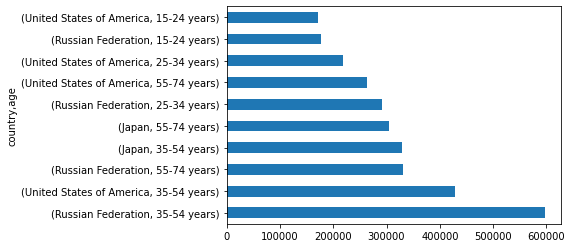

In [58]:
 go.groupby(['country','age']).suicides_no.sum().nlargest(10).plot(kind = 'barh')

More suicide cases have been reported among people aged 35 to 54.

# Gender wise suicides

/home/rkmveri/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


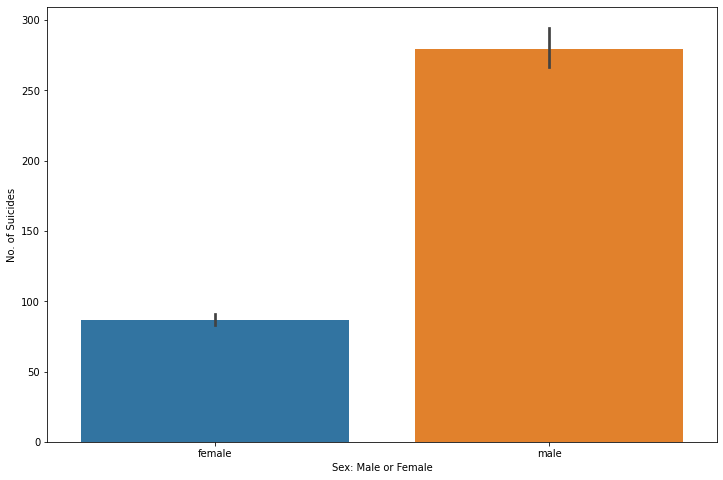

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(go['sex'],go['suicides_no'])
plt.xlabel('Sex: Male or Female')
plt.ylabel('No. of Suicides')
plt.show()


* More number of males have committed suicides as compared to females

# Age wise suicides 

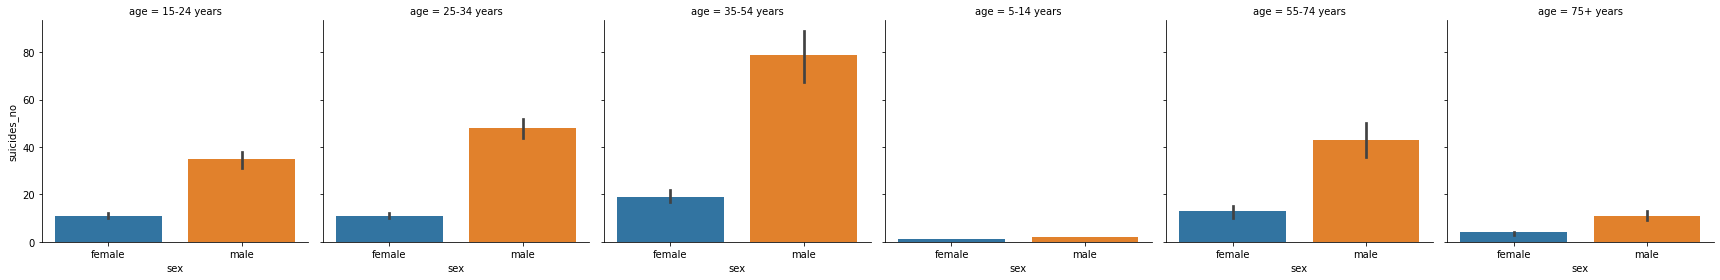

In [59]:
sns.catplot(x = 'sex' , y = 'suicides_no',data = go,col = 'age',kind = 'bar' , estimator = np.median , height= 4)
plt.show()

Age-wise, gender suciedes are more males than females.

# lets check the countries with more than 5000 suicides in age groupb 15-24 years

In [38]:
check = go[(go['age'] == '15-24 years') & (go['suicides_no'] >=5000)][['country',  'suicides_no' , 'sex' , 'Year Range']].sort_values('suicides_no' , ascending = False)
check.style.background_gradient(cmap = 'PuBu')

,country,suicides_no,sex,Year Range
33210,Russian Federation,6945.000000,male,1996 - 2005
33222,Russian Federation,6667.000000,male,1996 - 2005
33198,Russian Federation,6578.000000,male,1996 - 2005
33234,Russian Federation,6134.000000,male,1996 - 2005
33186,Russian Federation,6120.000000,male,1996 - 2005
33246,Russian Federation,5891.000000,male,1996 - 2005
33150,Russian Federation,5784.000000,male,1986 - 1995
33162,Russian Federation,5780.000000,male,1996 - 2005
33258,Russian Federation,5750.000000,male,1996 - 2005
33138,Russian Federation,5733.000000,male,1986 - 1995


# Create data for each year range

In [17]:
go['year'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 1983, 1984,
       2016, 1979, 1980, 1981, 1982])

In [18]:
bins = [1975, 1986, 1996, 2006, 2017]
labels = ['1975 - 1985','1986 - 1995','1996 - 2005','2006 - 2016']
go['Year Range'] = pd.cut(go.year, bins, labels = labels, include_lowest = True)
go.head()

,country,year,sex,age,suicides_no,population,Year Range
0,Albania,1985,female,15-24 years,0.0,277900.0,1975 - 1985
1,Albania,1985,female,25-34 years,0.0,246800.0,1975 - 1985
2,Albania,1985,female,35-54 years,0.0,267500.0,1975 - 1985
3,Albania,1985,female,5-14 years,0.0,298300.0,1975 - 1985
4,Albania,1985,female,55-74 years,0.0,138700.0,1975 - 1985


In [19]:
go['Year Range'].unique()

['1975 - 1985', '1986 - 1995', '1996 - 2005', '2006 - 2016']
Categories (4, object): ['1975 - 1985' < '1986 - 1995' < '1996 - 2005' < '2006 - 2016']

In [20]:
age_wise_year_1 = go[go['Year Range']== '1975 - 1985'].groupby('age')['suicides_no'].sum()
age_wise_year_2 = go[go['Year Range']== '1986 - 1995'].groupby('age')['suicides_no'].sum()
age_wise_year_3 = go[go['Year Range']== '1996 - 2005'].groupby('age')['suicides_no'].sum()
age_wise_year_4 = go[go['Year Range']== '2006 - 2016'].groupby('age')['suicides_no'].sum()

In [21]:
age_wise_year_4 

age
15-24 years    245390.0
25-34 years    340507.0
35-54 years    766811.0
5-14 years      16925.0
55-74 years    532427.0
75+ years      219748.0
Name: suicides_no, dtype: float64

# #Plot the data for 1975-1985

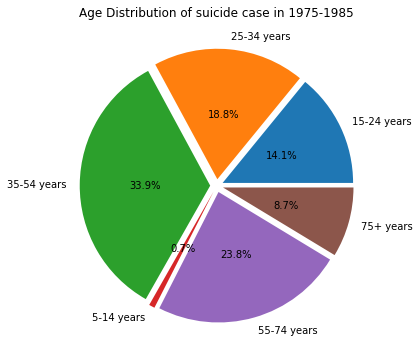

In [22]:
pie, ax = plt.subplots(figsize=[10,6])
labels = age_wise_year_1.keys()
plt.pie(x=age_wise_year_1, autopct='%.1f%%', explode=[0.05]*6,labels=labels, pctdistance=0.5)
plt.title('Age Distribution of suicide case in 1975-1985')
plt.show()

# Plot the data for 1986-1995

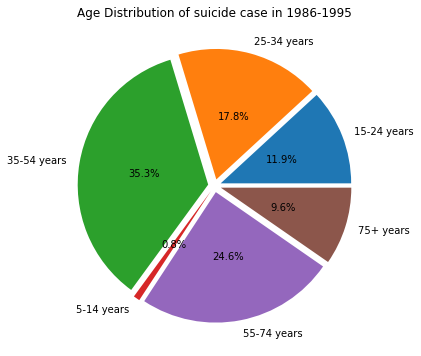

In [23]:
pie, ax = plt.subplots(figsize=[10,6])
labels = age_wise_year_2.keys()
plt.pie(x=age_wise_year_2, autopct='%.1f%%', explode=[0.05]*6,labels=labels, pctdistance=0.5)
plt.title('Age Distribution of suicide case in 1986-1995')
plt.show()

# Plot the data for 1996-2005

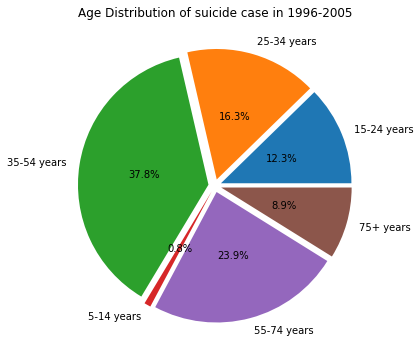

In [24]:
pie, ax = plt.subplots(figsize=[10,6])
labels = age_wise_year_3.keys()
plt.pie(x=age_wise_year_3, autopct='%.1f%%', explode=[0.05]*6,labels=labels, pctdistance=0.5)
plt.title('Age Distribution of suicide case in 1996-2005')
plt.show()

# Plot the data for 2006-2016

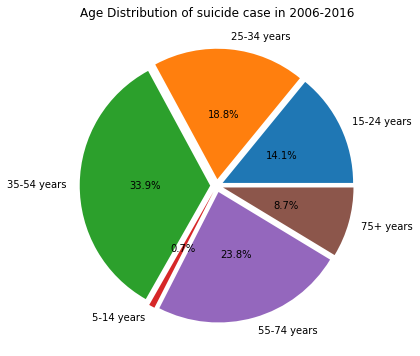

In [25]:
pie, ax = plt.subplots(figsize=[10,6])
labels = age_wise_year_1.keys()
plt.pie(x=age_wise_year_1, autopct='%.1f%%', explode=[0.05]*6,labels=labels, pctdistance=0.5)
plt.title('Age Distribution of suicide case in 2006-2016')
plt.show()

# Conclusion


    People in age groups 35-54 have the highest number of suicides
    People in age groupps 5-14 have the lowest number of suicides
    There was a dip in number of suicides in the years 1987-1989
    Japan has the thired highest number of suicides
    Number of male suicides is higher than female in most age wise.
